# Packages


In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
import re
import nltk
import networkx as nx
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import spacy
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

from sklearn.feature_extraction.text import TfidfVectorizer
from transformers import BertTokenizer, BertModel, pipeline
import torch
import getpass
import openai
from openai import OpenAI
from sklearn.metrics.pairwise import cosine_similarity, pairwise_distances
from sklearn.cluster import AgglomerativeClustering, SpectralClustering
# !pip install langchain_community
from community import community_louvain
#import faiss
#from bertopic import BERTopic
from sklearn.decomposition import LatentDirichletAllocation

from sklearn.model_selection import train_test_split
from transformers import BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
pip install pandas torch torch-geometric sentence-transformers networkx scipy scikit-learn

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 377, in run
    requirement_set = resolver.resolve(
                      ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 95, in resolve
    result = self._result = resolver.resolve(
                            ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_vendor/resolvelib/resolvers.py", line 546, in resolve
    state = resolution.resolve(requirements, max_rounds=max_rounds)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [ ]:
#pip install torch torchvision torchaudio torch-geometric pyg-lib torch-scatter torch-sparse torch-cluster torch-spline-conv -f https://data.pyg.org/whl/torch-$(python -c "import torch; print(torch.__version__)").html


# Data Preprocessing




## Data Loading

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/project/ai_articles.csv')

In [ ]:
data.head()

,interest_slug,story_id,title,description,date,url,lang,paywall,source_name,source_slug,...,source_biasRatings,source_lat,source_lon,source_place,article_title,article_description,article_image_url,article_text,article_date_publish,article_authors
0,ai,rss_10567_1740461771022_4,Nvidia's H20 chip orders jump as Chinese firms...,The surge in orders underlines Nvidia's domina...,2025-02-25T02:23:42.000Z,https://www.reuters.com/technology/artificial-...,NaN,sometimes,Reuters,reuters_fa2539,...,Ad Fontes Media:center; All Sides:center; Medi...,52.621203,-2.109763,United Kingdom,Exclusive: Nvidia's H20 chip orders jump as Ch...,The surge in orders underlines Nvidia's domina...,https://www.reuters.com/resizer/v2/EIP5MPMKXJP...,"Summary\nCompanies\nAlibaba, ByteDance, Tencen...",2025-02-25 00:54:57,Fanny Potkin; Che Pan
1,ai,rss_10567_1740461771022_4,DeepSeek’s AI models boost Nvidia chip demand ...,"Tencent, Alibaba and ByteDance are said to hav...",2025-02-25T01:59:54.000Z,https://www.scmp.com/tech/big-tech/article/329...,en,yes,South China Morning Post,south-china-morning-post,...,Ad Fontes Media:center; All Sides:center; Medi...,22.375863,114.096992,Hong Kong,DeepSeek’s AI models drive surging orders for ...,"Tencent, Alibaba and ByteDance are said to hav...",https://cdn.i-scmp.com/sites/default/files/sty...,"The surge in orders, which is being reported f...",2025-02-25 00:00:00,NaN
2,ai,rss_10567_1740461771022_4,Nvidia Sees Rush For H20 AI Chip Orders As Dee...,"Chinese tech giants Tencent, Alibaba, and Byte...",2025-02-25T02:23:42.000Z,https://www.benzinga.com/25/02/43931074/chines...,en,sometimes,Benzinga,benzinga,...,Ad Fontes Media:center; Media Bias/Fact Check:...,40.737516,-73.975301,"New York, New York, United States",Nvidia Sees Rush For H20 AI Chip Orders As Dee...,"Chinese tech giants Tencent, Alibaba, and Byte...",https://cdn.benzinga.com/files/images/story/20...,"Chinese tech giants Tencent Holdings TCEHY, Al...",2025-02-24 21:23:42,Ananya Gairola
3,ai,rss_10567_1740461771022_4,Nvidia gets a DeepSeek-inspired boost in China...,Nvidia’s H20 chips are in high demand in China...,2025-02-25T15:59:09.000Z,https://fortune.com/2025/02/25/nvidia-china-de...,en,yes,Fortune,fortune,...,Ad Fontes Media:center; All Sides:center; Medi...,40.705370,-73.980030,"New York, New York, United States",Nvidia gets a DeepSeek-inspired boost in China...,Nvidia’s H20 chips are in high demand in China...,https://fortune.com/img-assets/wp-content/uplo...,© 2025 Fortune Media IP Limited. All Rights Re...,2025-02-25 15:59:09,Beatrice Nolan
4,ai,rss_10567_1740461771022_4,"Alibaba, ByteDance, and Tencent boost orders f...",Nvidia's H20 chip gains traction in China amid...,2025-02-25T07:54:16.000Z,https://seekingalpha.com/news/4412923-alibaba-...,en,no,Seeking Alpha,seeking-alpha,...,Media Bias/Fact Check:leanRight,37.146554,-95.506712,United States,"Alibaba, ByteDance, and Tencent boost orders f...",Nvidia's H20 chip gains traction in China amid...,https://static.seekingalpha.com/cdn/s3/uploads...,( 2min )\nChinese companies are increasingly p...,2025-02-25 07:54:16,Arundhati Sarkar


In [ ]:
data.columns

Index(['index', 'interest_slug', 'story_id', 'title', 'description', 'date',
       'url', 'lang', 'paywall', 'source_name', 'source_slug', 'source_bias',
       'source_factuality', 'source_originalBias', 'source_storyCount',
       'source_owners', 'source_biasRatings', 'source_lat', 'source_lon',
       'source_place', 'article_title', 'article_description',
       'article_image_url', 'article_text', 'article_date_publish',
       'article_authors', 'llama_bias', 'score', 'llama_distill_bias',
       'score.1'],
      dtype='object')

In [ ]:
data['llama_distill_bias'].unique()

array([3, 2, 1, 4, 0])

In [ ]:
len(list(data['source_slug'].unique()))

5897

In [ ]:
data = data.dropna(subset=['article_title','article_text','source_slug','source_bias'])

In [ ]:
# Remove rows with same url but different refId
data = data.drop_duplicates(subset=['url'])
data.shape

(109641, 25)

In [ ]:
data = data.fillna('')

In [ ]:
data['article_date_publish'] = pd.to_datetime(data['article_date_publish'], errors='coerce')

In [ ]:
#How many articles we have
print(f'Total number of articles: ',len(data['article_text']))
print(f'Total number of unique articles: ',len(data['story_id'].unique()))

Total number of articles:  109641
Total number of unique articles:  9352


## Label Encoding

In [ ]:
data['source_bias'].unique()

array(['center', 'leanRight', 'unknown', 'leanLeft', 'right', 'left',
       'farLeft', 'farRight'], dtype=object)

In [ ]:
data['lang'].unique()

array(['', 'en', 'fr', 'de', 'en-US', 'es', 'bs', 'ro', 'it', 'sl', 'lt',
       'nl', 'sv', 'el', 'pt', 'he', 'ru', 'tr', 'nb', 'hu', 'zh-CN',
       'id', 'ar', 'cs', 'lv', 'fi', 'hr', 'ca', 'ja', 'sq', 'sk', 'pl',
       'ka', 'no', 'da', 'uk', 'en-GB', 'en_US', 'vi', 'zh', 'az', 'hi',
       'gu', 'en-us', 'sr', 'is', 'ko', 'en_gb', 'bg', 'utf', 'eng', 'af',
       'en-CA', 'th', 'mt', 'eu', 'zh-TW', 'mr', 'en-AU', 'et', 'en-ae',
       'be', 'pt-PT', 'te', 'fa', 'EN', 'zh-tw', 'nn', 'es_AR.UTF', 'iw',
       'ar_AR', 'local', 'bn', 'ceb', 'fil', 'all', 'sr/RS', 'km', 'ur',
       'NL', 'lb', 'yue', 'tt', 'rw', 'hi-Latn', 'en-in', 'oc', 'ilo',
       'ms', 'si', 'se', 'kr', 'en-gb', 'ha', 'cy', 'fo', 'zxx', 'tl',
       'gl'], dtype=object)

In [ ]:
data = data[data['source_bias'] != 'unknown']

In [ ]:
data['source_bias'].unique()

array(['center', 'leanRight', 'leanLeft', 'right', 'left', 'farLeft',
       'farRight'], dtype=object)

In [ ]:
bias_mapping = {
    0: 0,
    1: 0.25,
    2: 0.5,
    3: 0.75,
    4:1}
data['source_bias_score'] = data['llama_distill_bias'].map(bias_mapping)
print(data[['source_slug', 'source_bias', 'source_bias_score']].head())

KeyError: 'llama_distill_bias'

In [ ]:
# Scaled to [0,1] to prevent gradient explosion
bias_mapping = {
    'farLeft': 0.0,
    'left': 0.25,
    'leanLeft': 0.375,
    'center': 0.5,
    'leanRight': 0.625,
    'right': 0.75,
    'farRight': 1.0
}

data['source_bias_score'] = data['source_bias'].map(bias_mapping)
print(data[['source_slug', 'source_bias', 'source_bias_score']].head())


                source_slug source_bias  source_bias_score
0            reuters_fa2539      center              0.500
1  south-china-morning-post      center              0.500
2                  benzinga      center              0.500
3                   fortune      center              0.500
4             seeking-alpha   leanRight              0.625


In [ ]:
data['story_id'].shape

(30872,)

## Train-test split

In [ ]:
# We will use train data to build the bipartite graph
# And test data for evaluation
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [ ]:
print(f"Train Data: {train_data.shape}, Test Data: {test_data.shape}")

Train Data: (24697, 26), Test Data: (6175, 26)


# Bipartite Graph

## Packages

In [ ]:
import os
import torch
import torch.nn.functional as F
import networkx as nx
import numpy as np
import pandas as pd
from torch_geometric.utils import from_networkx
from torch_geometric.nn import SAGEConv
from torch_geometric.loader import NeighborLoader
from sentence_transformers import SentenceTransformer
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from torch_geometric.nn import GCNConv

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [ ]:
#Possibly no need for these

# Extract Edge Index for PyTorch Geometric
#edge_index_list = []

#for article_id, source_slug in G.edges:
#    if article_id in article_idx_map and source_slug in source_idx_map:
#        article_idx = article_idx_map[article_id]
#        source_idx = source_idx_map[source_slug]
#        edge_index_list.append([article_idx, source_idx])

#edge_index = torch.tensor(edge_index_list, dtype=torch.long).T.to(device)

# Assign Edge Attributes (political inclination)
#edge_attr_list = []
#for edge in G.edges:
#    story_id, source_slug = edge
#    bias_score = train_data.loc[
#        (train_data['story_id'] == story_id) & (train_data['source_slug'] == source_slug),
#        'source_bias_score'
#    ].values
    # print(bias_score) # Debugging
#    edge_attr_list.append(bias_score[0])

# Convert Edge Attributes to PyTorch Tensor
#edge_attr = torch.tensor(edge_attr_list, dtype=torch.float32).view(-1, 1).to(device)

# Debugging Output
#print(f"Edge Index Shape: {edge_index.shape}")  # Expected: [2, num_edges]
#print(f"Edge Attr Shape: {edge_attr.shape}")    # Expected: [num_edges, 1]


## Embedding

In [ ]:
from sentence_transformers import SentenceTransformer

# Load Sentence Transformer model
sentence_model = SentenceTransformer("all-MiniLM-L6-v2", device=device)

# Encode article texts
article_embeddings = sentence_model.encode(train_data['article_text'].tolist(), batch_size=256, convert_to_tensor=True)


In [ ]:
# Store embeddings and bias scores in a dictionary { (story_id, media_slug) → (embedding, bias_score) }
edge_features = {}
edge_weights = {}
i=0
for idx, row in train_data.iterrows():
    edge_features[(row['story_id'], row['source_slug'])] = article_embeddings[i]
    edge_weights[(row['story_id'], row['source_slug'])] = row['source_bias_score']
    i+=1

In [ ]:
article_embeddings[0].shape

torch.Size([384])

## Graph Construction

In [ ]:
import networkx as nx
import torch
import pandas as pd
from torch_geometric.utils import from_networkx

# Create a Directed Graph to prevent duplicate edges
G = nx.DiGraph()  # Change from `nx.Graph()` to `nx.DiGraph()`

# Unique node mapping
unique_nodes = list(set(train_data['story_id']).union(set(train_data['source_slug'])))
node_mapping = {node: idx for idx, node in enumerate(unique_nodes)}

# Add nodes
G.add_nodes_from(node_mapping.values())

edges = []
edge_attrs = []
edge_weights_list = []

# Iterate through train_data to add directed edges
for _, row in train_data.iterrows():
    article_id = row['story_id']
    media_slug = row['source_slug']
    bias_score = row['source_bias_score']

    if pd.notna(article_id) and pd.notna(media_slug) and pd.notna(bias_score):
        if article_id in node_mapping and media_slug in node_mapping:
            article_idx = node_mapping[article_id]
            media_idx = node_mapping[media_slug]

            # Add directed edge (Only one direction to prevent duplication)
            G.add_edge(article_idx, media_idx, weight=bias_score)

            edges.append((article_idx, media_idx))
            edge_weights_list.append(bias_score)

            # Store edge attributes (article embeddings)
            if (article_id, media_slug) in edge_features:
                edge_attrs.append(torch.tensor(edge_features[(article_id, media_slug)], dtype=torch.float))
            else:
                edge_attrs.append(torch.zeros(300, dtype=torch.float))

# Convert NetworkX to PyG Graph (No duplicate edges)
pyg_graph = from_networkx(G)

# Assign edge attributes
pyg_graph.edge_attr = torch.stack(edge_attrs)
pyg_graph.edge_weight = torch.tensor(edge_weights_list, dtype=torch.float)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

num_nodes = pyg_graph.num_nodes
pyg_graph.x = torch.zeros((num_nodes, 384), dtype=torch.float).to(device)
pyg_graph = pyg_graph.to(device)

# Debug: Check if edges are fixed
print(f"Total nodes in pyg_graph: {pyg_graph.num_nodes}")
print(f"Total edges in pyg_graph: {pyg_graph.edge_index.shape[1]}")  # Should now be correct (HALF of previous)
print(f"Max node index in edge_index: {pyg_graph.edge_index.max().item()}")


<ipython-input-76-2493ee7c02bd>:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  edge_attrs.append(torch.tensor(edge_features[(article_id, media_slug)], dtype=torch.float))


Total nodes in pyg_graph: 14138
Total edges in pyg_graph: 60942
Max node index in edge_index: 14137


In [ ]:
torch.save(pyg_graph, "bipartite_graph_with_edge_features.pt")

In [ ]:
print(f"Total nodes in pyg_graph: {pyg_graph.num_nodes}")  # Should match node_mapping length
print(f"Total edges in pyg_graph: {pyg_graph.edge_index.shape[1]}")
print(f"Max node index in edge_index: {pyg_graph.edge_index.max().item()}")
print(f"Unique nodes in mapping: {len(set(train_data['story_id']).union(set(train_data['source_slug'])))}")

Total nodes in pyg_graph: 14138
Total edges in pyg_graph: 60942
Max node index in edge_index: 14137
Unique nodes in mapping: 14138


## Graph Visualization

### 1. Plotting top 60 most connected nodes

In [ ]:
story_to_title_map = train_data.groupby('story_id')['article_title'].first().to_dict()

In [ ]:
media_slug_map = train_data.groupby('source_slug')['source_name'].first().to_dict()

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.patches as mpatches

# Identify the top 60 most connected nodes (highest degree)
top_nodes = [node for node, degree in sorted(G.degree(), key=lambda x: x[1], reverse=True)[:60]]

# Extract subgraph with only the top nodes and their connections
G_top = G.subgraph(top_nodes)

# Compute layout positions
pos = nx.spring_layout(G_top, seed=42, k=1.5)  # k controls spacing

# Identify articles & media nodes in the subgraph
article_nodes = {n for n, d in G_top.nodes(data=True) if G.nodes[n].get("bipartite") == 0}
media_nodes = set(G_top) - article_nodes

# Compute node sizes based on degree
node_sizes = {n: G_top.degree[n] * 100 for n in G_top.nodes()}

# Assign node labels (story_id for articles, source_slug for media)
node_labels = {node: node for node in G_top.nodes()}
article_labels = {n: story_to_title_map[n][:30] + "..." if len(n) > 30 else story_to_title_map[n] for n in article_nodes}
media_labels = {n: media_slug_map[n] for n in media_nodes}

# Retrieve edge weights (political bias scores)
edge_weights = nx.get_edge_attributes(G_top, "weight")
edge_bias_values = list(edge_weights.values())

# Map bias scores to colors
cmap = plt.cm.coolwarm
edge_colors = [cmap(score) for score in edge_bias_values]

# Create bias legend
bias_labels = list(bias_mapping.keys())
bias_values = list(bias_mapping.values())
bias_colors = [cmap(v) for v in bias_values]

KeyError: 7555

In [ ]:
# Visualization function
def visualize_top_graph(G_top, title="Top 60 Most Connected Articles & Media Outlets"):

    fig, ax = plt.subplots(figsize=(20, 12))

    # Draw nodes separately to distinguish articles and media outlets
    nx.draw_networkx_nodes(G_top, pos, nodelist=article_nodes, node_color="white", edgecolors="blue",
                           node_size=[node_sizes[n] for n in article_nodes], label="Articles")
    nx.draw_networkx_nodes(G_top, pos, nodelist=media_nodes, node_color="white", edgecolors="red",
                           node_size=[node_sizes[n] for n in media_nodes], label="Media Outlets")


    nx.draw_networkx_edges(G_top, pos, edge_color=edge_colors, width=2, alpha=0.8)

    # Add node labels
    #if node_labels:
    nx.draw_networkx_labels(G_top, pos, labels=article_labels, font_size=6, font_color="black", font_weight="bold")
    nx.draw_networkx_labels(G_top, pos, labels=media_labels, font_size=6, font_color="black", font_weight="bold")

    # Add node labels (story_id or source_slug)
    #nx.draw_networkx_labels(G_top, pos, labels=node_labels, font_size=8, font_color="black", font_weight="bold")

    # Add a colorbar legend for political bias
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=1))
    cbar = fig.colorbar(sm, ax=ax, label="Political Bias Score")

    # Create separate legends for bias categories and node types
    bias_patches = [mpatches.Patch(color=color, label=label) for label, color in zip(bias_labels, bias_colors)]
    node_patches = [mpatches.Patch(color="blue", label="Articles"),
                    mpatches.Patch(color="red", label="Media Outlets")]

    # Separate placement of legends
    legend1 = plt.legend(handles=bias_patches, title="Bias Categories", loc="upper right")
    legend2 = plt.legend(handles=node_patches, title="Node Types", loc="upper left")

    ax.add_artist(legend1)  # Ensure both legends appear

    # Display the graph
    plt.title(title)
    plt.axis("off")
    plt.show()

In [ ]:
# Call the function to visualize the graph with correct labels
visualize_top_graph(G_top)

### 2. Degree Distribution

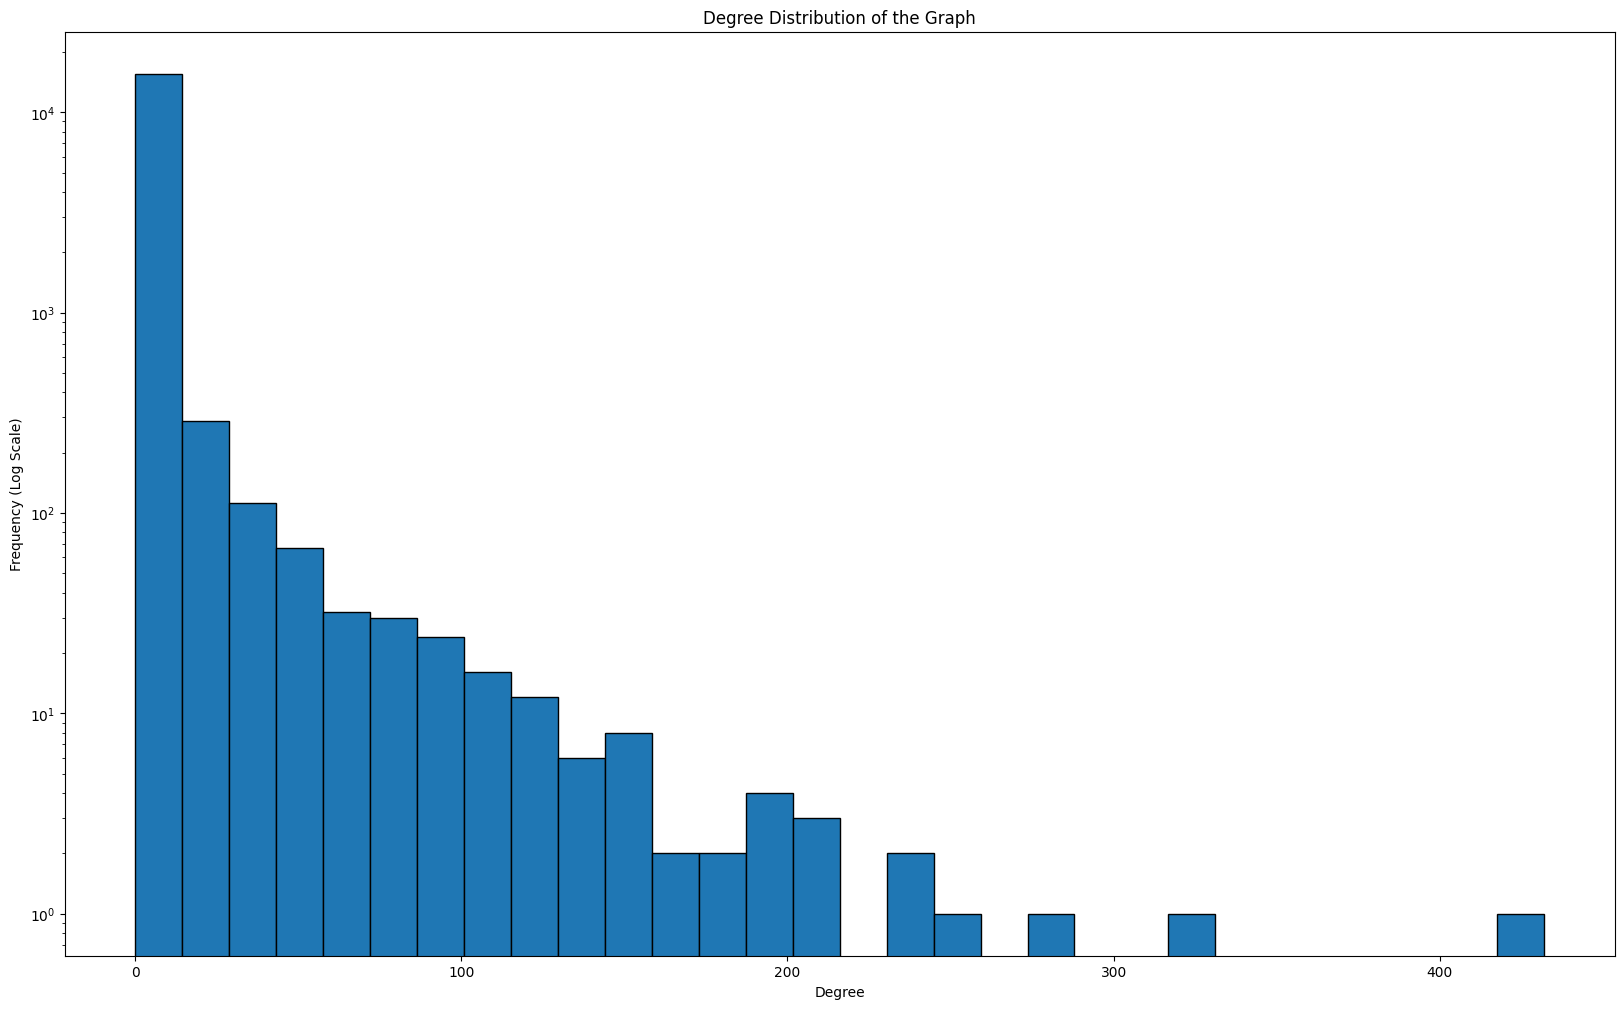

In [ ]:
degrees = [d for _, d in G.degree()]
plt.figure(figsize=(20, 12))
plt.hist(degrees, bins=30, edgecolor="black", log=True)
plt.xlabel("Degree")
plt.ylabel("Frequency (Log Scale)")
plt.title("Degree Distribution of the Graph")
plt.show()

### 3. Edge Weight Distribution

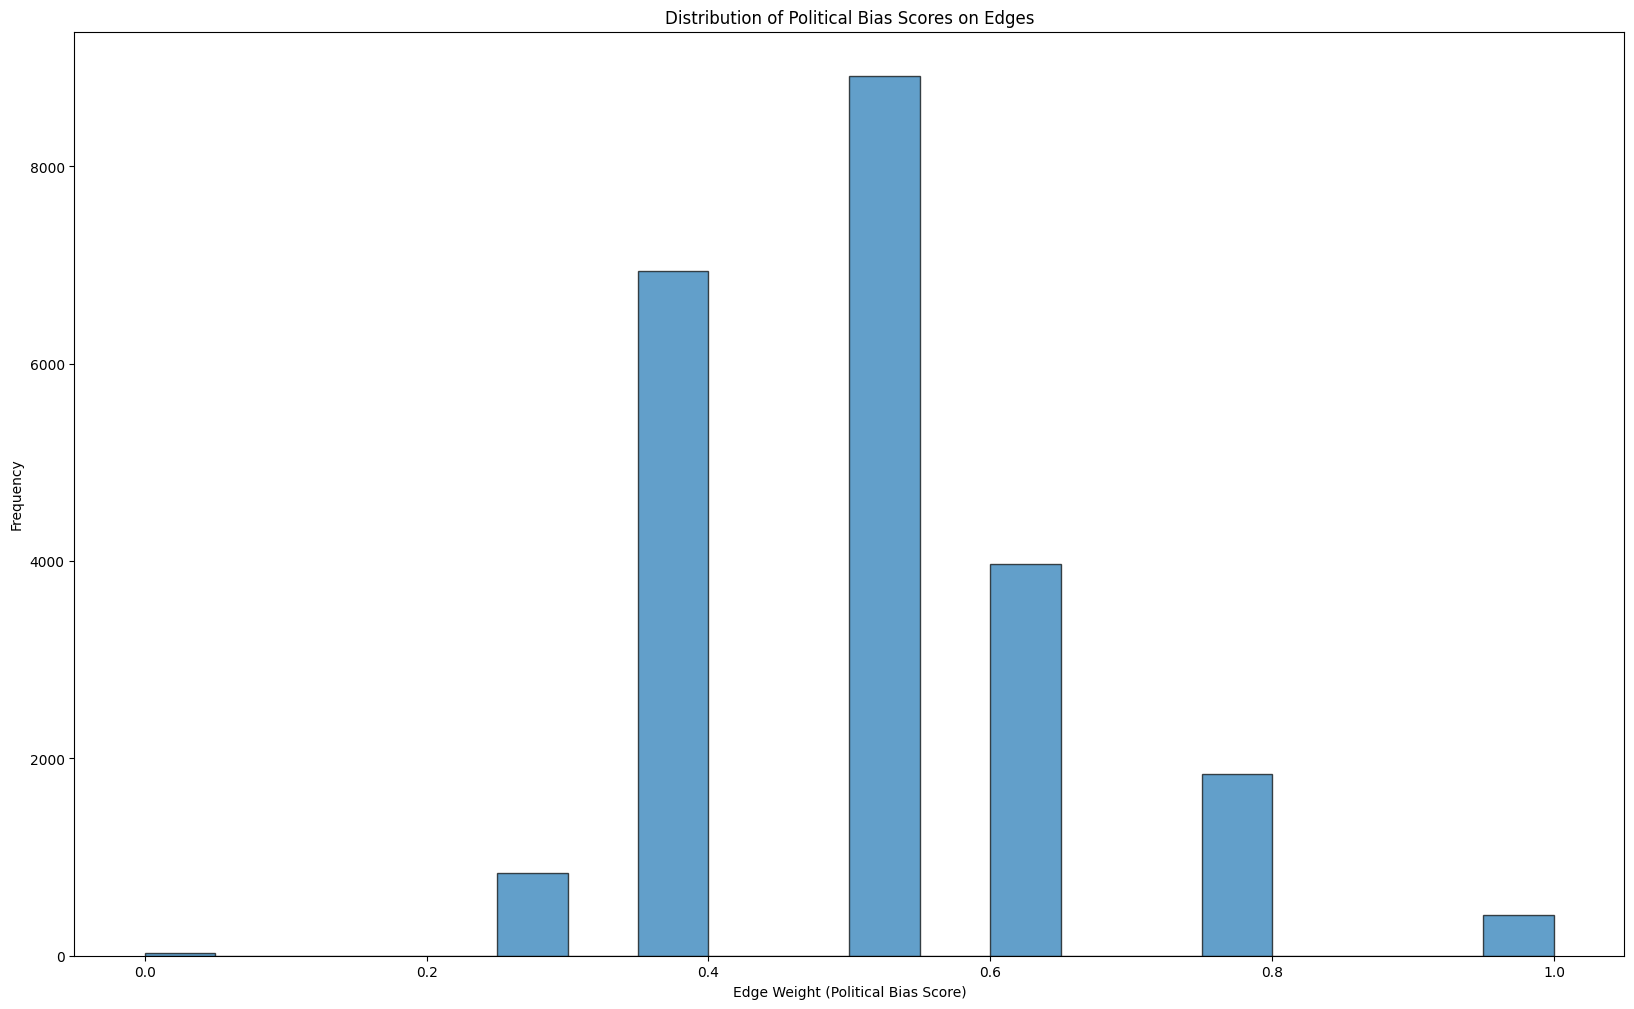

In [ ]:
edge_weights = pyg_graph.edge_weight.tolist()  # Extract political bias scores
plt.figure(figsize=(20, 12))
plt.hist(edge_weights, bins=20, edgecolor="black", alpha=0.7)
plt.xlabel("Edge Weight (Political Bias Score)")
plt.ylabel("Frequency")
plt.title("Distribution of Political Bias Scores on Edges")
plt.show()

### 4. Article Embedding visualization

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from sklearn.manifold import TSNE

def visualize_article_embeddings_colored(pyg_graph, media_bias_scores):
    """
    Visualizes article embeddings using t-SNE with color-coding based on media bias.

    Args:
        pyg_graph: The PyTorch Geometric graph object containing edge attributes (article embeddings).
        media_bias_scores: A list or array containing political bias scores for each media source.
    """

    # Convert embeddings to numpy
    edge_embeddings = pyg_graph.edge_attr.cpu().numpy()

    tsne = TSNE(n_components=2, random_state=42)
    embeddings_2d = tsne.fit_transform(edge_embeddings)

    # Plot t-SNE visualization with color-coded embeddings
    plt.figure(figsize=(20, 12))
    scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=media_bias_scores, cmap="coolwarm", alpha=0.7)
    plt.colorbar(scatter, label="Political Bias Score (Normalized)")
    plt.title("t-SNE Visualization of Article Embeddings (Color-coded by Media Bias)")
    plt.xlabel("t-SNE Component 1")
    plt.ylabel("t-SNE Component 2")
    plt.show()


visualize_article_embeddings_colored(pyg_graph, pyg_graph.edge_weight.cpu().numpy())


KeyboardInterrupt: 

# GNN

## Training

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, global_mean_pool

class BipartiteGCN(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(BipartiteGCN, self).__init__()

        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)
        self.fc = nn.Linear(out_channels, 1)  # Predict bias score

    def forward(self, data):
        x, edge_index, edge_attr, edge_weight = data.x, data.edge_index, data.edge_attr, data.edge_weight

        # ---- Aggregate edge attributes (article embeddings) ----
        x_aggregated = global_mean_pool(edge_attr, edge_index[0])  # Aggregate per node

        # Aggregate edge weights per node before applying
        edge_weight_per_node = global_mean_pool(edge_weight.view(-1, 1), edge_index[0])

        # Ensure same shape before multiplication
        if x_aggregated.shape[0] == edge_weight_per_node.shape[0]:
            x_weighted = x_aggregated * edge_weight_per_node
        else:
            print(f"Shape mismatch: x_aggregated={x_aggregated.shape}, edge_weight_per_node={edge_weight_per_node.shape}")
            x_weighted = x_aggregated  # Fallback if mismatch persists

        # Move tensors to the same device
        x_weighted, edge_index = x_weighted.to(data.x.device), edge_index.to(data.x.device)

        # GCN layers
        x = self.conv1(x_weighted, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)

        return self.fc(x).squeeze()



In [ ]:
from torch.optim import Adam

# Initialize model
model = BipartiteGCN(in_channels=384, hidden_channels=64, out_channels=32).to(device)

optimizer = Adam(model.parameters(), lr=0.005, weight_decay=5e-4)
criterion = nn.MSELoss()

# Training Loop (No Batching)
EPOCHS = 100
for epoch in range(EPOCHS):
    model.train()
    optimizer.zero_grad()

    # Forward pass (single graph input)
    node_predictions = model(pyg_graph)

    edge_pred = node_predictions[pyg_graph.edge_index[0]]  # Map node predictions to edges

    # Compute loss (now shapes match: edge_pred.shape == edge_weight.shape)
    loss = criterion(edge_pred, pyg_graph.edge_weight.to(device))

    mae = F.l1_loss(edge_pred, pyg_graph.edge_weight.to(device)).item()


    # Backpropagation
    loss.backward()
    optimizer.step()

    # Print training progress
    print(f"Epoch {epoch + 1}, Loss: {loss:.8f}, MAE: {mae:.8f}")

# Save trained model
torch.save(model.state_dict(), "bipartite_gcn_model_with_edge_features.pth")
print("Model training complete and saved.")


Epoch 1, Loss: 0.27784732, MAE: 0.50797051
Epoch 2, Loss: 0.25647408, MAE: 0.48679554
Epoch 3, Loss: 0.23290938, MAE: 0.46222833
Epoch 4, Loss: 0.20585591, MAE: 0.43231845
Epoch 5, Loss: 0.17721200, MAE: 0.39820978
Epoch 6, Loss: 0.14607465, MAE: 0.35741448
Epoch 7, Loss: 0.11317030, MAE: 0.30840093
Epoch 8, Loss: 0.08059251, MAE: 0.25074092
Epoch 9, Loss: 0.05126206, MAE: 0.18682578
Epoch 10, Loss: 0.02929136, MAE: 0.12876102
Epoch 11, Loss: 0.01955765, MAE: 0.10588802
Epoch 12, Loss: 0.02595366, MAE: 0.13302147
Epoch 13, Loss: 0.04154957, MAE: 0.17318003
Epoch 14, Loss: 0.05222249, MAE: 0.19751160
Epoch 15, Loss: 0.05306226, MAE: 0.19952759
Epoch 16, Loss: 0.04591754, MAE: 0.18404046
Epoch 17, Loss: 0.03568712, MAE: 0.15947258
Epoch 18, Loss: 0.02655105, MAE: 0.13555393
Epoch 19, Loss: 0.02070088, MAE: 0.11611038
Epoch 20, Loss: 0.01842864, MAE: 0.10370815
Epoch 21, Loss: 0.01895768, MAE: 0.10335066
Epoch 22, Loss: 0.02110161, MAE: 0.10924680
Epoch 23, Loss: 0.02373764, MAE: 0.115806

## Evaluation

In [ ]:

test_article_embeddings = sentence_model.encode(test_data['article_text'].tolist(), batch_size=256, convert_to_tensor=True)

test_edge_features = {}
test_edge_weights = {}
i=0
for _, row in test_data.iterrows():
    test_edge_features[(row['story_id'], row['source_slug'])] = test_article_embeddings[i]
    test_edge_weights[(row['story_id'], row['source_slug'])] = row['source_bias_score']
    i+=1


In [ ]:
print(test_edge_weights)

{('b866eaf8-6afa-4775-90af-de03d1047c63', 'dnyuz'): 0.625, ('c4373f3a-93da-411e-8db5-5f9b4c2b0797', 'engadget'): 0.375, ('rss_12290_1735211370944_1', 'the-gateway-pundit'): 1.0, ('0440f978-efa4-488a-8eba-2f3323c68470', 'die-presse'): 0.625, ('8ad54357-471a-4a0f-8766-cf8a7a205b6c', '_57539d'): 0.25, ('af9cc74d-ea9f-402a-903f-3c313802db4d', 'futurism'): 0.375, ('rss_10829_1734033298194_7', 'barrietodaycom'): 0.375, ('rss_18409_1737109773210_1', 'wptz'): 0.5, ('61e309b2-67d1-416a-93e6-88a15b681a50', 'associated-press-news'): 0.375, ('0b5c7f8c-6c82-421c-a20a-c2b60beb9cb8', 'zdfde'): 0.5, ('rss_23182_1738684626298_3', 'meduza'): 0.25, ('rss_12626_1739864857719_23', 'the-clarion-news'): 0.625, ('rss_17606_1735827655729_22', 'techxplorecom'): 0.5, ('rss_10427_1735713387329_4', 'vidmaxcom'): 1.0, ('a3d124bd-eb38-4cbf-83ba-2c49725c8a6c', 'techcrunch'): 0.5, ('rss_13211_1737011336392_9', 'channel-news-asia'): 0.5, ('rss_24343_1737982003271_2', 'novinkycz'): 0.375, ('rss_20731_1738323629985_3', '

In [ ]:
test_data['source_bias_score']

,source_bias_score
77893,0.625
74504,0.375
58075,1.000
22131,0.625
40363,0.250
...,...
49482,0.500
78204,0.375
75504,0.375
21297,0.500


In [ ]:
import networkx as nx
import torch
import pandas as pd
from torch_geometric.utils import from_networkx

# Create a Directed Graph to prevent duplicate edges
test_G = nx.DiGraph()  # Change from `nx.Graph()` to `nx.DiGraph()`

# Unique node mapping
test_unique_nodes = list(set(test_data['story_id']).union(set(test_data['source_slug'])))
test_node_mapping = {test_node: test_idx for test_idx, test_node in enumerate(test_unique_nodes)}

# Add nodes
test_G.add_nodes_from(test_node_mapping.values())

test_edges = []
test_edge_attrs = []
test_edge_weights_list = []

# Iterate through train_data to add directed edges
for _, row in test_data.iterrows():
    test_article_id = row['story_id']
    test_media_slug = row['source_slug']
    test_bias_score = row['source_bias_score']

    if pd.notna(test_article_id) and pd.notna(test_media_slug) and pd.notna(test_bias_score):
        if test_article_id in test_node_mapping and test_media_slug in test_node_mapping:
            test_article_idx = test_node_mapping[test_article_id]
            test_media_idx = test_node_mapping[test_media_slug]

            # Add directed edge (Only one direction to prevent duplication)
            test_G.add_edge(test_article_idx, test_media_idx, weight=test_bias_score)

            test_edges.append((test_article_idx, test_media_idx))
            test_edge_weights_list.append(test_bias_score)

            # Store edge attributes (article embeddings)
            if (test_article_id, test_media_slug) in test_edge_features:
                test_edge_attrs.append(torch.tensor(test_edge_features[(test_article_id, test_media_slug)], dtype=torch.float))
            else:
                test_edge_attrs.append(torch.zeros(300, dtype=torch.float))

# Convert NetworkX to PyG Graph (No duplicate edges)
test_pyg_graph = from_networkx(test_G)

# Assign edge attributes
test_pyg_graph.edge_attr = torch.stack(test_edge_attrs)
test_pyg_graph.edge_weight = torch.tensor(test_edge_weights_list, dtype=torch.float)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

test_num_nodes = test_pyg_graph.num_nodes
test_pyg_graph.x = torch.zeros((test_num_nodes, 384), dtype=torch.float).to(device)
test_pyg_graph = test_pyg_graph.to(device)

# Debug: Check if edges are fixed
print(f"Total nodes in pyg_graph: {test_pyg_graph.num_nodes}")
print(f"Total edges in pyg_graph: {test_pyg_graph.edge_index.shape[1]}")  # Should now be correct (HALF of previous)
print(f"Max node index in edge_index: {test_pyg_graph.edge_index.max().item()}")


<ipython-input-104-117f9f0bc222>:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_edge_attrs.append(torch.tensor(test_edge_features[(test_article_id, test_media_slug)], dtype=torch.float))


Total nodes in pyg_graph: 3702
Total edges in pyg_graph: 6175
Max node index in edge_index: 3701


In [ ]:
print(f"test_pyg_graph.x: {test_pyg_graph.x}")
print(f"test_pyg_graph.edge_weight: {test_pyg_graph.edge_weight}")
print(f"test_pyg_graph.edge_attr: {test_pyg_graph.edge_attr}")
print(f"test_pyg_graph.edge_index shape: {test_pyg_graph.edge_index.shape}")
print(f"Max index in edge_index: {test_pyg_graph.edge_index.max().item()}")


test_pyg_graph.x: tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0')
test_pyg_graph.edge_weight: tensor([0.6250, 0.3750, 1.0000,  ..., 0.3750, 0.5000, 0.6250], device='cuda:0')
test_pyg_graph.edge_attr: tensor([[-0.0468, -0.0584, -0.0325,  ..., -0.0891,  0.0004,  0.0207],
        [-0.0635, -0.0463, -0.0050,  ..., -0.0228,  0.0134, -0.0019],
        [ 0.0511,  0.0372, -0.0347,  ..., -0.1465,  0.0042, -0.0191],
        ...,
        [ 0.0108, -0.0477,  0.0232,  ..., -0.0348, -0.0014, -0.0295],
        [-0.1065,  0.0140,  0.0556,  ..., -0.0813,  0.0079,  0.0938],
        [-0.0829,  0.0840, -0.0095,  ...,  0.0061, -0.0552, -0.0470]],
       device='cuda:0')
test_pyg_graph.edge_index shape: torch.Size([2, 6175])
Max index in edge_index: 3701


In [ ]:
print(f"test_pyg_graph.x: {test_pyg_graph.x.shape if hasattr(test_pyg_graph, 'x') and test_pyg_graph.x is not None else 'None'}")
print(f"test_pyg_graph.edge_index: {test_pyg_graph.edge_index.shape if hasattr(test_pyg_graph, 'edge_index') and test_pyg_graph.edge_index is not None else 'None'}")
print(f"test_pyg_graph.edge_weight: {test_pyg_graph.edge_weight.shape if hasattr(test_pyg_graph, 'edge_weight') and test_pyg_graph.edge_weight is not None else 'None'}")


test_pyg_graph.x: torch.Size([3702, 384])
test_pyg_graph.edge_index: torch.Size([2, 6175])
test_pyg_graph.edge_weight: None


In [ ]:
import torch
import torch.nn.functional as F
from sklearn.metrics import r2_score
import scipy.stats as stats

def evaluate_model(model, test_pyg_graph, criterion):
    """
    Evaluates the trained GCN model on the test dataset.

    Args:
    - model (torch.nn.Module): Trained GCN model.
    - test_pyg_graph (torch_geometric.data.Data): Test graph in PyTorch Geometric format.
    - criterion (torch.nn.Module): Loss function used for training.

    Returns:
    - loss (float): Test loss.
    - mse (float): Mean Squared Error.
    - mae (float): Mean Absolute Error.
    - r2 (float): R-squared score.
    - pearson_corr (float): Pearson correlation coefficient.
    """
    model.eval()  # Set model to evaluation mode

    with torch.no_grad():
        # Forward pass (predict node values)
        node_predictions = model(test_pyg_graph)

        # Extract edge-level predictions
        edge_pred = node_predictions[test_pyg_graph.edge_index[0]]

        # Compute loss (same as during training)
        loss = criterion(edge_pred, test_pyg_graph.edge_weight.to(test_pyg_graph.x.device)).item()

        # Convert to CPU for metric computation
        edge_pred = edge_pred.cpu().numpy()
        true_bias_scores = test_pyg_graph.edge_weight.cpu().numpy()

        # Compute Evaluation Metrics
        mae = F.l1_loss(torch.tensor(edge_pred), torch.tensor(true_bias_scores)).item()

    # Print results
    print("Model Performance on Test Data:")
    print(f"Loss: {loss:.8f}, MAE: {mae:.8f}")


    return loss, mae



In [ ]:
# Load trained model
model.load_state_dict(torch.load("bipartite_gcn_model_with_edge_features.pth"))
model.to(device)
model.eval()

# Convert test_data to PyTorch Geometric format
test_pyg_graph = from_networkx(test_G)  # Convert test graph
test_pyg_graph = test_pyg_graph.to(device)  # Move to GPU if available

# Assign node features (if missing)
if not hasattr(test_pyg_graph, "x") or test_pyg_graph.x is None:
    num_nodes = test_pyg_graph.num_nodes
    feature_dim = 384  # Same as training
    test_pyg_graph.x = torch.zeros((num_nodes, feature_dim), dtype=torch.float).to(device)

criterion = nn.MSELoss()
# Evaluate Model on Test Data
evaluate_model(model, test_pyg_graph,criterion)


<ipython-input-108-b9124fa60671>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("bipartite_gcn_model_with_edge_features.pth"))


AttributeError: 'NoneType' object has no attribute 'dim'

In [ ]:
print(f"test_pyg_graph.x: {test_pyg_graph.x.shape if hasattr(test_pyg_graph, 'x') and test_pyg_graph.x is not None else 'None'}")
print(f"test_pyg_graph.edge_index: {test_pyg_graph.edge_index.shape if hasattr(test_pyg_graph, 'edge_index') and test_pyg_graph.edge_index is not None else 'None'}")
print(f"test_pyg_graph.edge_weight: {test_pyg_graph.edge_weight.shape if hasattr(test_pyg_graph, 'edge_weight') and test_pyg_graph.edge_weight is not None else 'None'}")


test_pyg_graph.x: torch.Size([3702, 384])
test_pyg_graph.edge_index: torch.Size([2, 6175])
test_pyg_graph.edge_weight: None
